<a href="https://colab.research.google.com/github/TimotheeeNiven/IntroML_TNiven/blob/main/Homework3_TNiven.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
# Use the URL for the raw CSV data -- more datasets can be find here: https://github.com/satishgunjal/datasets
url = '/content/drive/MyDrive/IntroML/CSVFiles/diabetes.csv'

dataset = pd.read_csv(url)

# Display the first 5 rows of the DataFrame
print(dataset.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [29]:
from sklearn.preprocessing import StandardScaler
import statistics
# Calculate the standard deviation
columns = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']

scaler = StandardScaler()

# Fit and transform the scaler into the forementioned calculation
dataset[columns] = scaler.fit_transform(dataset[columns])
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,0
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,0
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1


In [30]:
#Data set locations and shit
X = dataset.iloc[:, [0,1,2,3,4,5,6,7]].values
Y = dataset.iloc[:, 8].values

In [31]:
#Splitting the training and test data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)

In [32]:
#Make an instance classifier of the object LogisticRegression and give random_state =  0
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [33]:
#Matrix building time
from sklearn.metrics import confusion_matrix
Y_pred = classifier.predict(X_test)
cnf_matrix = confusion_matrix(Y_test, Y_pred)
cnf_matrix

array([[98,  9],
       [18, 29]])

In [34]:
#Good ol' model evaluation
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))
print("Precision:",metrics.precision_score(Y_test, Y_pred))
print("Recall:",metrics.recall_score(Y_test, Y_pred))
print("F1 Score:", metrics.f1_score(Y_test, Y_pred))

Accuracy: 0.8246753246753247
Precision: 0.7631578947368421
Recall: 0.6170212765957447
F1 Score: 0.6823529411764706


Text(0.5, 427.9555555555555, 'Predicted label')

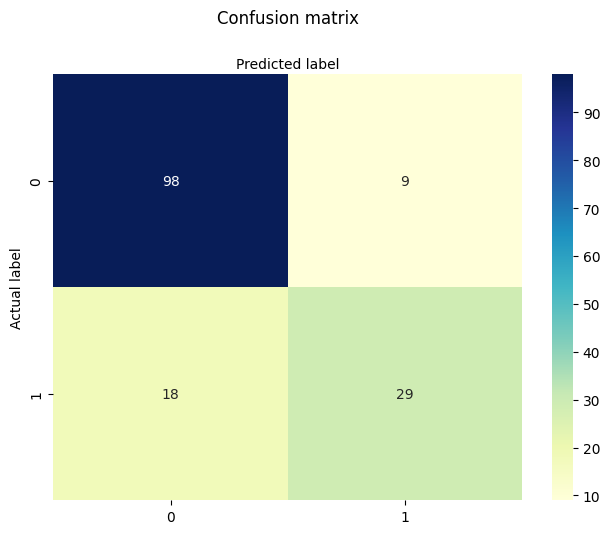

In [35]:
#Here's some visual representation
import seaborn as sns
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Problem 2a



In [36]:
urlCancer = '/content/drive/MyDrive/IntroML/CSVFiles/cancer.csv'

cancerdataset = pd.read_csv(urlCancer)

# Display the first 5 rows of the DataFrame
print(cancerdataset.head())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

In [37]:
# Calculate the standard deviation
columnsCancer = ['radius_mean',	'texture_mean',	'perimeter_mean',	'area_mean',	'smoothness_mean',	'compactness_mean'	,'concavity_mean','concave points_mean',	'symmetry_mean'	,'fractal_dimension_mean',	'radius_se',	'texture_se',	'perimeter_se',	'area_se',	'smoothness_se',	'compactness_se',	'concavity_se',	'concave points_se',	'symmetry_se',	'fractal_dimension_se'	,'radius_worst',	'texture_worst',	'perimeter_worst',	'area_worst',	'smoothness_worst',	'compactness_worst',	'concavity_worst',	'concave points_worst',	'symmetry_worst',	'fractal_dimension_worst']

def binary_map(x):
    return x.map({'M': 1, 'B': 0})
scaler = StandardScaler()

# Fit and transform the scaler into the forementioned calculation

cancerdataset[columnsCancer] = scaler.fit_transform(cancerdataset[columnsCancer])
cancerdataset[['diagnosis']] = cancerdataset[['diagnosis']].apply(binary_map)
cancerdataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,...,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,NaN
1,842517,1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,...,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,NaN
2,84300903,1,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,...,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,NaN
3,84348301,1,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,...,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010,NaN
4,84358402,1,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,...,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100,NaN


In [38]:
#Data set locations and shit
X2a = cancerdataset.iloc[:, [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31]].values
Y2a = cancerdataset.iloc[:, 1].values

In [39]:
#Splitting the training and test data
from sklearn.model_selection import train_test_split
X_train2a, X_test2a, Y_train2a, Y_test2a = train_test_split(X2a, Y2a, test_size = 0.20, random_state = 0)

In [40]:
#Make an instance classifier of the object LogisticRegression and give random_state =  0
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train2a, Y_train2a)

LogisticRegression(random_state=0)

In [41]:
#Matrix building time
from sklearn.metrics import confusion_matrix
Y_pred2a = classifier.predict(X_train2a)
cnf_matrix2a = confusion_matrix(Y_train2a, Y_pred2a)
cnf_matrix2a

array([[289,   1],
       [  4, 161]])

In [42]:
#Good ol' model evaluation
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(Y_train2a, Y_pred2a))
print("Precision:",metrics.precision_score(Y_train2a, Y_pred2a))
print("Recall:",metrics.recall_score(Y_train2a, Y_pred2a))
print("F1 Score:", metrics.f1_score(Y_train2a, Y_pred2a))

Accuracy: 0.989010989010989
Precision: 0.9938271604938271
Recall: 0.9757575757575757
F1 Score: 0.9847094801223242


Text(0.5, 427.9555555555555, 'Predicted label')

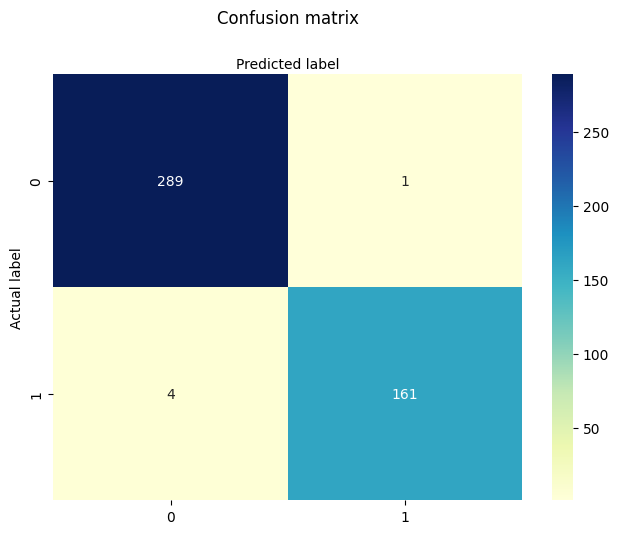

In [43]:
#Here's some visual representation
import seaborn as sns
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix2a), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Problem 2B

In [44]:
#Splitting the training and test data
from sklearn.model_selection import train_test_split
X_train2b, X_test2b, Y_train2b, Y_test2b = train_test_split(X2a, Y2a, test_size = 0.20, random_state = 0)

In [45]:
C = [10, 5, 1, .1, .001]

for c in C:
    classification = LogisticRegression(penalty='l1', C=c, solver='liblinear')
    classification.fit(X_train2b, Y_train2b)
    print('C:', c)
    print('Training accuracy:\t%5.4f' %clf.score(X_train2b, Y_train2b))
    print('Test accuracy:\t\t%5.4f' %clf.score(X_test2b, Y_test2b))
    print('')

C: 10
Training accuracy:	0.9758
Test accuracy:		0.9737

C: 5
Training accuracy:	0.9758
Test accuracy:		0.9737

C: 1
Training accuracy:	0.9758
Test accuracy:		0.9737

C: 0.1
Training accuracy:	0.9758
Test accuracy:		0.9737

C: 0.001
Training accuracy:	0.9758
Test accuracy:		0.9737



In [46]:
#Add the parameter penalty into the already existinf LogisticRegression model
clf = LogisticRegression(penalty='l1', C=0.1, solver='liblinear')
clf.fit(X_train2b, Y_train2b)

Y_pred2b = clf.predict(X_test2b)

param_cnf_matrix = confusion_matrix(Y_test2b, Y_pred2b)

In [47]:
#Matrix building time
from sklearn.metrics import confusion_matrix
Y_pred2b = classifier.predict(X_train2b)
cnf_matrix2b = confusion_matrix(Y_train2b, Y_pred2b)
cnf_matrix2b

array([[289,   1],
       [  4, 161]])

Text(0.5, 427.9555555555555, 'Predicted label')

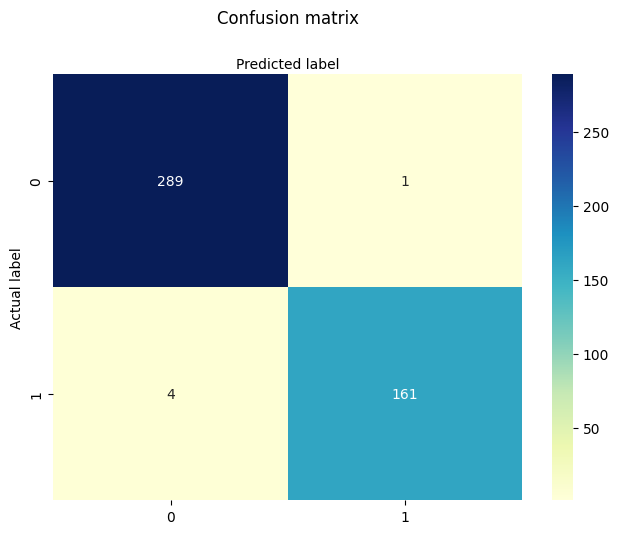

In [48]:
#Here's some visual representation
import seaborn as sns
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix2b), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [53]:
#Good ol' model evaluation
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(Y_train2b, Y_pred2b))
print("Precision:",metrics.precision_score(Y_train2b, Y_pred2b))
print("Recall:",metrics.recall_score(Y_train2b, Y_pred2b))
print("F1 Score:", metrics.f1_score(Y_train2b, Y_pred2b))

Accuracy: 0.989010989010989
Precision: 0.9938271604938271
Recall: 0.9757575757575757
F1 Score: 0.9847094801223242


Problem 3

In [49]:
# Gaussian Naive Bayes
from sklearn import datasets
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
# fit a Naive Bayes model to the data
model = GaussianNB()

model.fit(X2a,Y2a)
# make predictions
expected = Y2a
predicted = model.predict(X2a)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       357
           1       0.94      0.90      0.92       212

    accuracy                           0.94       569
   macro avg       0.94      0.93      0.94       569
weighted avg       0.94      0.94      0.94       569

[[344  13]
 [ 21 191]]


Text(0.5, 427.9555555555555, 'Predicted label')

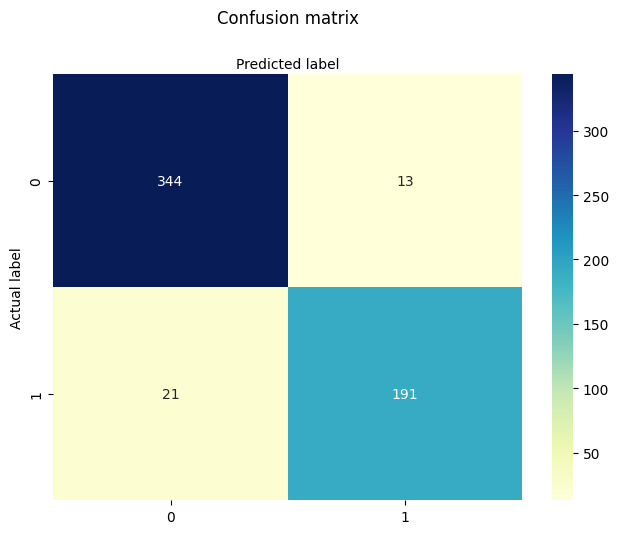

In [50]:
#Here's some visual representation
import seaborn as sns
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(metrics.confusion_matrix(expected, predicted), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Problem 4 (20pts):

Use the cancer dataset to build a logistic regression model to classify the type of cancer (Malignant vs. benign). Use the PCA feature extraction for your training. Perform N number of independent training (N=1, …, K). Identify the optimum number of K, principal components that achieve the highest classification accuracy. Report your classification accuracy, precision, recall, and F1 score over a different number of Ks. Explain and elaborate on your results and compare them against problems 2 and 3.

In [51]:
from sklearn.decomposition import PCA
# Split the data into a training and testing set
X_train4, X_test4, y_train4, y_test4 = train_test_split(X2a, Y2a, test_size=0.2, random_state=0)

# Apply PCA
pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train4)
X_test_pca = pca.transform(X_test4)

model = GaussianNB()

model.fit(X_train_pca,y_train4)
# make predictions
expected4 = y_test4
predicted4 = model.predict(X_test_pca)
# summarize the fit of the model
print(metrics.classification_report(expected4, predicted4))
print(metrics.confusion_matrix(expected4, predicted4))


              precision    recall  f1-score   support

           0       0.93      0.96      0.94        67
           1       0.93      0.89      0.91        47

    accuracy                           0.93       114
   macro avg       0.93      0.92      0.93       114
weighted avg       0.93      0.93      0.93       114

[[64  3]
 [ 5 42]]


Problem 5 (20pts):

Can you repeat problem 4? This time, replace the Bayes classifier with logistic regression. Report your results (classification accuracy, precision, recall and F1 score). Compare your results against problems 2, 3 and 4.

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
# Split the data into a training and testing set
X_train5, X_test5, y_train5, y_test5 = train_test_split(X2a, Y2a, test_size=0.2, random_state=0)

# Apply PCA
pca2 = PCA(n_components=4)
X_train_pca2 = pca2.fit_transform(X_train4)
X_test_pca2 = pca2.transform(X_test4)

# Use the Logistic classifier to fit the data
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train_pca2, y_train5)

# Make predictions on the test data
y_pred5 = classifier.predict(X_test_pca2)

#Good ol' model evaluation
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test5, y_pred5))
print("Precision:",metrics.precision_score(y_test5, y_pred5))
print("Recall:",metrics.recall_score(y_test5, y_pred5))
print("F1 Score:", metrics.f1_score(y_test5, y_pred5))

Accuracy: 0.9473684210526315
Precision: 0.9361702127659575
Recall: 0.9361702127659575
F1 Score: 0.9361702127659575
